# Extreme Gradient Boost


### Initialization

In [1]:
import numpy as np
import pandas as pd
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

filename = "encoded_data_04_13.csv"
df = pd.read_csv(f"../DataSets/EncodedData/{filename}", sep=",", encoding="UTF-8")
df.head()

,name,height_in_cm,year,goals_for,goals_against,goals,assists,red_cards,yellow_cards,minutes_played,market_value_in_eur,age_at_evaluation,log_market_value_base10,country_of_citizenship_encoded,sub_position_encoded,club_id_encoded,domestic_competition_id_encoded
0,Miroslav Klose,184.0,2012.75,31.0,14.0,11.0,1.0,0.0,6.0,1483.0,4000000.0,35,6.60206,7.191504e+06,5.331868e+06,7.836111e+06,7.182738e+06
1,Miroslav Klose,184.0,2013.25,24.0,15.0,5.0,2.0,0.0,2.0,1102.0,2000000.0,35,6.30103,7.191504e+06,5.331868e+06,7.836111e+06,7.182738e+06
2,Miroslav Klose,184.0,2013.75,14.0,21.0,4.0,2.0,0.0,1.0,950.0,1000000.0,36,6.00000,7.191504e+06,5.331868e+06,7.836111e+06,7.182738e+06
3,Miroslav Klose,184.0,2014.25,24.0,22.0,4.0,3.0,0.0,1.0,1270.0,1000000.0,36,6.00000,7.191504e+06,5.331868e+06,7.836111e+06,7.182738e+06
4,Miroslav Klose,184.0,2014.75,31.0,18.0,4.0,3.0,0.0,2.0,496.0,1000000.0,37,6.00000,7.191504e+06,5.331868e+06,7.836111e+06,7.182738e+06


### Training and Prediction

In [2]:
X = df.drop(columns=['log_market_value_base10', 'name', 'market_value_in_eur'])
y = df['log_market_value_base10']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=42)

model = XGBRegressor(n_estimators=10000, max_depth=7, random_state=42)

# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = model.predict(X_test)

In [3]:
print(X_test.shape)

(12080, 14)


In [4]:

z = pd.merge(X_test, df, on=['height_in_cm','year','goals_for','goals_against','goals','assists','red_cards','yellow_cards','minutes_played','age_at_evaluation','country_of_citizenship_encoded','sub_position_encoded','club_id_encoded','domestic_competition_id_encoded'])
print(z.shape)
z.set_index(X_test.index, inplace=True)
z['Predicted_Value_log'] = y_pred
z['Predicted_Value'] = np.power(10, y_pred)

results = z[['name', 'year', 'market_value_in_eur', 'Predicted_Value', 'log_market_value_base10', 'Predicted_Value_log']]
results = results.sort_values(by='Predicted_Value', ascending=False)
results



(12080, 17)


,name,year,market_value_in_eur,Predicted_Value,log_market_value_base10,Predicted_Value_log
115380,Jude Bellingham,2023.75,180000000.0,3.216463e+08,8.255273,8.507379
56905,Raheem Sterling,2020.75,110000000.0,1.903778e+08,8.041393,8.279616
106186,Erling Haaland,2021.25,130000000.0,1.374200e+08,8.113943,8.138050
84975,Marcus Rashford,2023.25,80000000.0,1.340703e+08,7.903090,8.127333
34793,Neymar,2017.75,180000000.0,1.323553e+08,8.255273,8.121741
...,...,...,...,...,...,...
9660,Ruslan Adzhindzhal,2015.25,50000.0,3.718994e+04,4.698970,4.570426
117726,Konstantinos Nikolopoulos,2020.75,50000.0,3.254824e+04,4.698970,4.512527
30349,Adessoye Oyewole,2019.25,25000.0,2.992533e+04,4.397940,4.476039
76066,Jordan Roberts,2015.75,50000.0,2.474348e+04,4.698970,4.393461


In [5]:
carlo_holse_rows = z[z['name'] == 'Krzysztof Piatek']
carlo_holse_rows = z[z['name'] == 'Erling Haaland']
carlo_holse_rows = carlo_holse_rows.sort_values(by='year', ascending=True)
print(carlo_holse_rows[["name", "goals_for", "goals", "minutes_played", "age_at_evaluation", "year", "market_value_in_eur", "Predicted_Value"]])

                  name  goals_for  goals  minutes_played  age_at_evaluation  \
106183  Erling Haaland       16.0    8.0           374.0                 20   
106186  Erling Haaland       61.0   24.0          2419.0                 21   

           year  market_value_in_eur  Predicted_Value  
106183  2019.75           60000000.0       13081132.0  
106186  2021.25          130000000.0      137420048.0  


### Model Performance

In [6]:
# Reverse normalization for actual values
y_test_original = np.power(10, y_test)

# Reverse normalization for predicted values
y_pred_original = np.power(10, y_pred)

# Calculate the mean squared error
mse = mean_squared_error(y_test_original, y_pred_original)
print(f'Mean Squared Error: {mse}')

# Calculate the mean squared percentage error
percentage_error = (mse / y_test_original.mean()) * 100
print(f'Mean squared Percentage Error: {percentage_error}%')


from sklearn.metrics import mean_absolute_percentage_error
result = mean_absolute_percentage_error(y_pred=y_pred_original, y_true=y_test_original)
print("Mean Absolute Percentage Error: ", result)

Mean Squared Error: 22793573651069.24
Mean squared Percentage Error: 484205426.97935784%
Mean Absolute Percentage Error:  0.49085550274615297


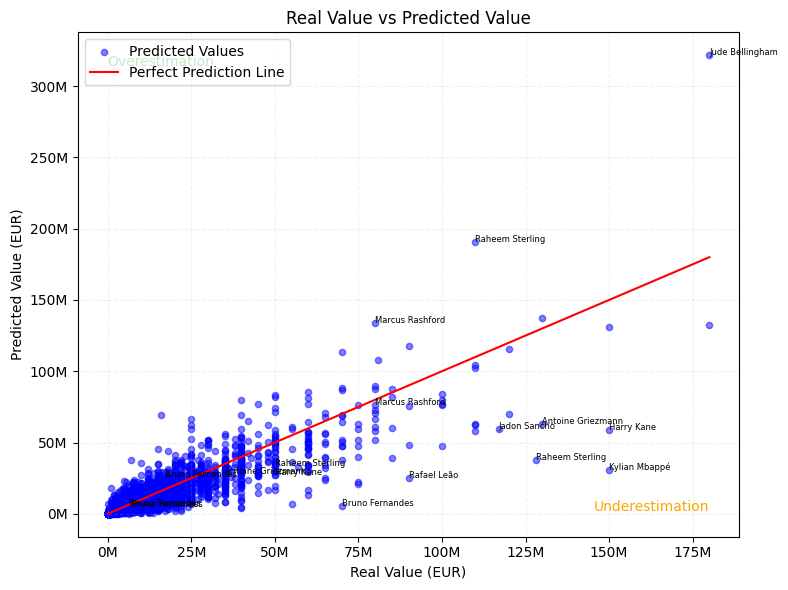

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
# Calculate distances of each point from the optimal line
distances = np.abs(y_pred_original - y_test_original)

# Find the indices of points with maximum distances
max_distance_indices = np.argsort(distances)[-10:]  # Adjust the number to show more or fewer names

# Get the corresponding player names
furthest_names = z.iloc[max_distance_indices]['name'].tolist()

# Plot
plt.figure(figsize=(8, 6))
plt.scatter(y_test_original, y_pred_original, s=20, color='blue', alpha=0.5, marker='o', label='Predicted Values')
plt.xlabel("Real Value (EUR)")
plt.ylabel("Predicted Value (EUR)")
plt.title("Real Value vs Predicted Value")
plt.plot([min(y_test_original), max(y_test_original)], [min(y_test_original), max(y_test_original)], color='red', label='Perfect Prediction Line')
plt.text(min(y_test_original), max(y_pred_original), "Overestimation", fontsize=10, color='green', verticalalignment='top', horizontalalignment='left')
plt.text(max(y_test_original), min(y_pred_original), "Underestimation", fontsize=10, color='orange', verticalalignment='bottom', horizontalalignment='right')

# Annotate only the furthest points
for index, row in z.iterrows():
    if row['name'] in furthest_names:
        plt.annotate(row['name'], (row['market_value_in_eur'], row['Predicted_Value']), fontsize=6, color='black')

# Set formatter for x-axis and y-axis
def millions_formatter(x, pos):
    return f'{x / 1000000:.0f}M'

formatter = FuncFormatter(millions_formatter)
plt.gca().xaxis.set_major_formatter(formatter)
plt.gca().yaxis.set_major_formatter(formatter)

plt.grid(alpha=0.2, linestyle='--', zorder=1)
plt.legend()
plt.tight_layout()
plt.show()


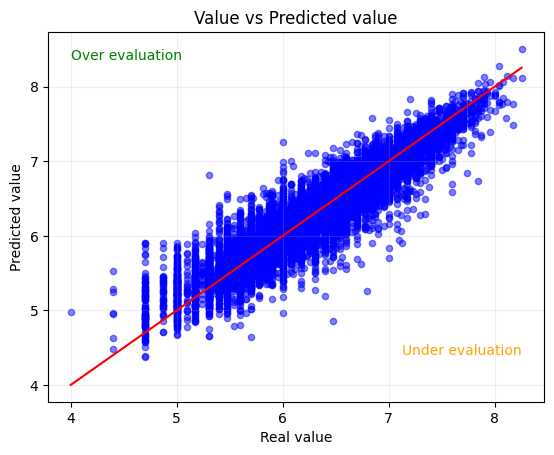

In [8]:
import matplotlib.pyplot as plt

# Scatter plot
plt.scatter(y_test, y_pred, s=20, color='blue', alpha=0.5)  # Set dot size to 20, blue color, and transparency to 0.5
plt.xlabel("Real value")
plt.ylabel("Predicted value")
plt.title("Value vs Predicted value")

# Add diagonal line
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')
plt.text(min(y_test), max(y_pred), "Over evaluation", fontsize=10, color='green', verticalalignment='top', horizontalalignment='left')
plt.text(max(y_test), min(y_pred), "Under evaluation", fontsize=10, color='orange', verticalalignment='bottom', horizontalalignment='right')
plt.grid(alpha=0.2, zorder=1)

plt.show()


20000000.0


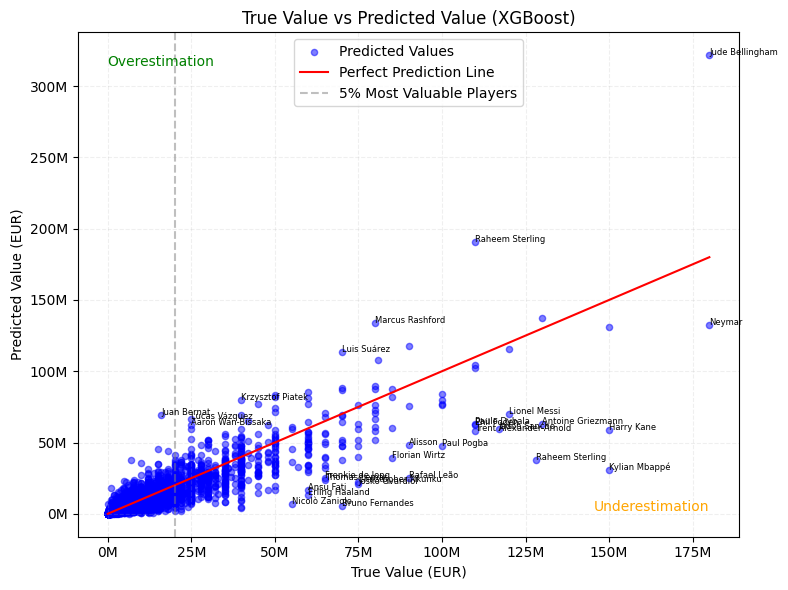

In [9]:
import numpy as np

# Calculate distances of each point from the optimal line
distances = np.abs(y_pred_original - y_test_original)

# Find the indices of points with maximum distances
max_distance_indices = np.argsort(distances)[-30:]  # Adjust the number to show more or fewer names

# Get the corresponding player names
furthest_names = z.iloc[max_distance_indices]['name'].tolist()

# Plot
plt.figure(figsize=(8, 6))
plt.scatter(y_test_original, y_pred_original, s=20, color='blue', alpha=0.5, marker='o', label='Predicted Values')
plt.xlabel("True Value (EUR)")
plt.ylabel("Predicted Value (EUR)")
plt.title("True Value vs Predicted Value (XGBoost)")
plt.plot([min(y_test_original), max(y_test_original)], [min(y_test_original), max(y_test_original)], color='red', label='Perfect Prediction Line')
plt.text(min(y_test_original), max(y_pred_original), "Overestimation", fontsize=10, color='green', verticalalignment='top', horizontalalignment='left')
plt.text(max(y_test_original), min(y_pred_original), "Underestimation", fontsize=10, color='orange', verticalalignment='bottom', horizontalalignment='right')

# Annotate only the furthest points
for index in max_distance_indices:
    row = z.iloc[index]
    plt.annotate(row['name'], (row['market_value_in_eur'], row['Predicted_Value']), fontsize=6, color='black')

# Set formatter for x-axis and y-axis
def millions_formatter(x, pos):
    return f'{x / 1000000:.0f}M'

# Identify the 1% most valuable players
top_1_percent = z.nlargest(int(len(z) * 0.05), 'market_value_in_eur')
top_1_percent = top_1_percent.sort_values(by='market_value_in_eur')
lowest_value_player = top_1_percent.iloc[0]['market_value_in_eur']
# Add vertical line for the 1% most valuable players
print(lowest_value_player)
plt.axvline(x=lowest_value_player, color='gray', linestyle='--', label='5% Most Valuable Players', alpha=0.5)
    
formatter = FuncFormatter(millions_formatter)
plt.gca().xaxis.set_major_formatter(formatter)
plt.gca().yaxis.set_major_formatter(formatter)

plt.grid(alpha=0.2, linestyle='--', zorder=1)
plt.legend()
plt.tight_layout()
plt.show()


In [10]:
XGBRegressor.plot_importance(model)

AttributeError: type object 'XGBRegressor' has no attribute 'plot_importance'